In [1]:
!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!unzip dataset.zip?dl=0

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

#  Building our Model To train the data 

In [3]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

In [4]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

# Preparing our data using data generator

In [5]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [6]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "train", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 350 images belonging to 7 classes.


# visualizaing the data that is fed to train data gen

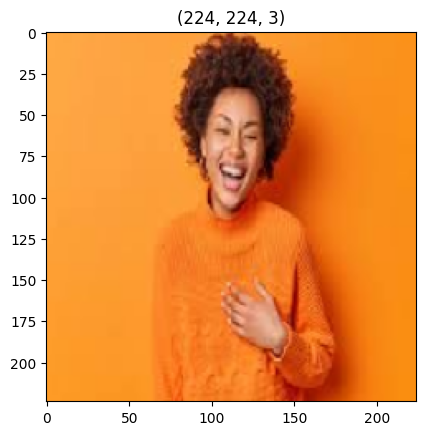

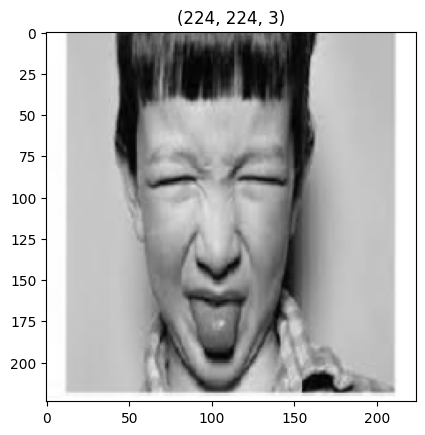

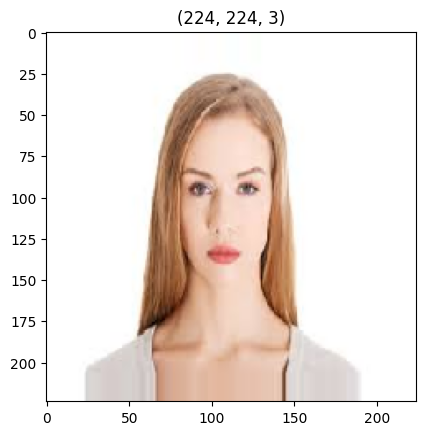

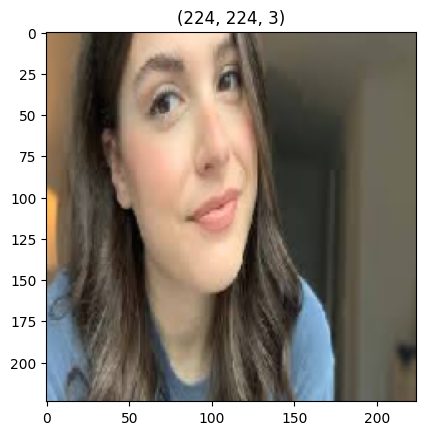

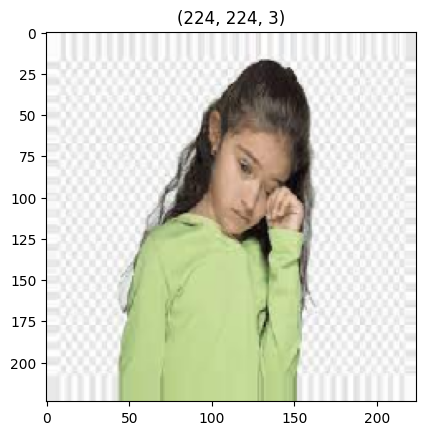

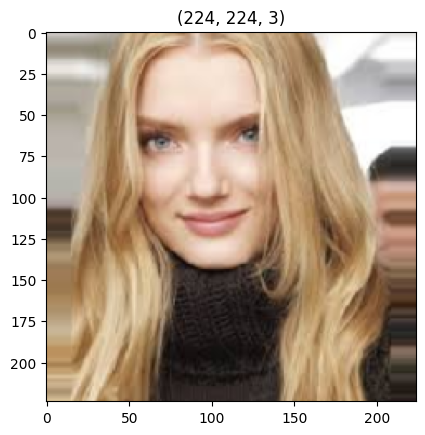

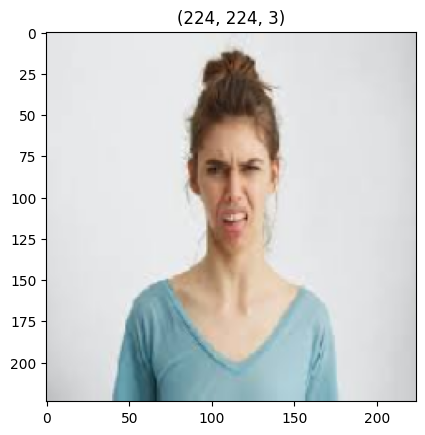

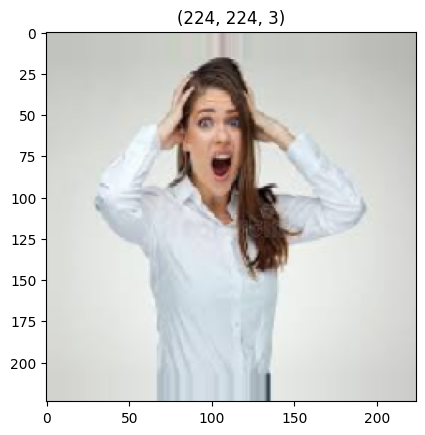

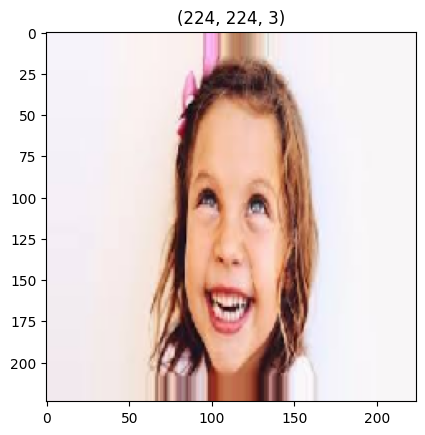

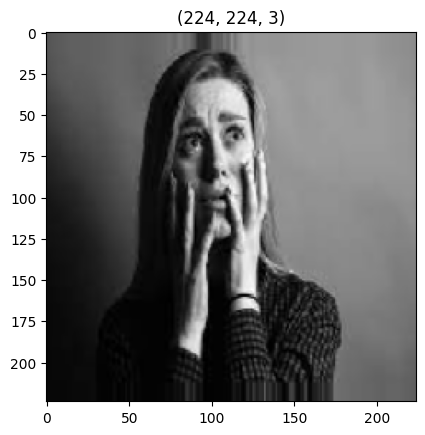

In [7]:
# to visualize the images in the traing data denerator 

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

# having early stopping and model check point

In [8]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [9]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 30, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[es,mc])

C:\Users\shrij\AppData\Local\Temp\ipykernel_25240\564963302.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/30


10/10 [==============================] - ETA: 0s - loss: 11.3686 - accuracy: 0.1667
Epoch 1: val_accuracy improved from -inf to 0.48828, saving model to best_model.h5


C:\Users\shrij\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 12s 995ms/step - loss: 11.3686 - accuracy: 0.1667 - val_loss: 3.8410 - val_accuracy: 0.4883
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 3.7772 - accuracy: 0.5220
Epoch 2: val_accuracy improved from 0.48828 to 0.70703, saving model to best_model.h5
10/10 [==============================] - 9s 893ms/step - loss: 3.7772 - accuracy: 0.5220 - val_loss: 2.0903 - val_accuracy: 0.7070
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 2.3571 - accuracy: 0.6855
Epoch 3: val_accuracy improved from 0.70703 to 0.86328, saving model to best_model.h5
10/10 [==============================] - 11s 1s/step - loss: 2.3571 - accuracy: 0.6855 - val_loss: 0.7530 - val_accuracy: 0.8633
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 1.1483 - accuracy: 0.8019
Epoch 4: val_accuracy improved from 0.86328 to 0.92188, saving model to best_model.h5
10/10 [==============================] - 8s 862ms/step - loss: 1.14

In [10]:

# Loading the best fit model 
from keras.models import load_model
model = load_model("best_model.h5")

In [11]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

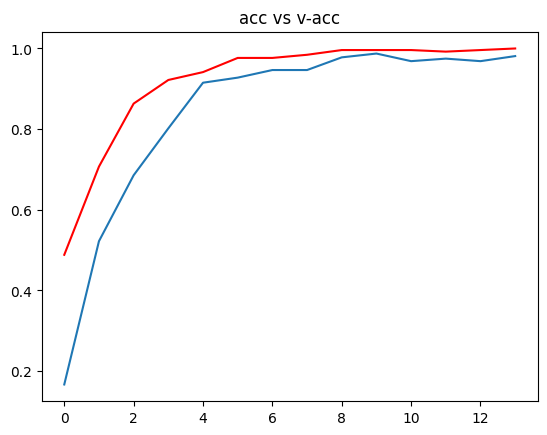

In [12]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

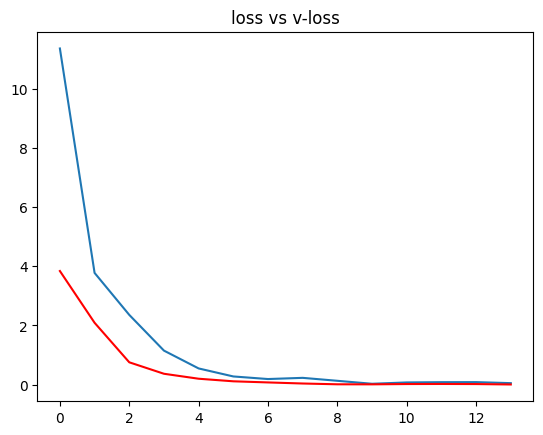

In [13]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [14]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

# Load your pre-trained model
model = load_model("best_model.h5")

# Define your class labels
op = {0:'Angry',1:'Disguist',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}  # Replace with your class labels

# Function to preprocess the input image
def preprocess_image(frame):
    frame = cv2.resize(frame, (224, 224))
    frame = frame / 255.0
    return np.expand_dims(frame, axis=0)

# Open a connection to the camera
cap = cv2.VideoCapture(0)  # Change to the appropriate camera index if you have multiple cameras

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Preprocess the frame
    input_arr = preprocess_image(frame)

    # Make prediction
    pred = np.argmax(model.predict(input_arr))

    # Display prediction
    cv2.putText(frame, f"Predicted Class: {op[pred]}", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the frame
    cv2.imshow('Real-time Prediction', frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close OpenCV windows
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 59ms/step
